### Candidate numbers

Sophia Bevers: 38, Hanna Klein: 49, Hanna Øklend: 6.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Part 1: Reading in the data

1.1

In [2]:

folder_path = '../TECH2-GROUP-TERM-PAPER/data' 

# List all CSV files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Exclude the CPI file 
files_to_read = [f for f in all_files if 'CPI' not in f.upper()]

# Read all SCE files into a dictionary of DataFrames
dfs = []
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    dfa = pd.read_csv(file_path, sep = ';', parse_dates = ['date'])
    dfs.append(dfa)
df = pd.concat(dfs, ignore_index=True)
df



,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70024705,201404,2014-04-03,1.0,0.0,3.0,23.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70024720,201404,2014-04-02,0.5,0.0,4.0,65.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70024744,201404,2014-04-02,0.6,0.0,4.0,52.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70024764,201404,2014-04-08,0.4,1.0,4.0,46.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70024781,201404,2014-04-10,0.8,1.0,3.0,61.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


1.2

In [3]:
print(f'Number of uniqe induviduals:', df['userid'].nunique())
print(f'Number of observations:', len(df))
print(f'Number of survey waves:', df['wid'].nunique())
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

Number of uniqe induviduals: 23369
Number of observations: 176101
Number of survey waves: 139
The first date: 2013-06-01
The last date: 2024-12-31


### Part 2: Data pre-processing

2.1

In [ ]:

# creates a list of the seven question correct-collumns 
coll = [f'num_lit_q{n}_correct' for n in (1,2,3,5,6,8,9)]


for col in coll:
    # Get the first non-NaN value per user in this column
    first_vals = df.groupby('userid')[col].transform('first')
    
    # Fill NaNs in the original column with the corresponding first value
    df[col] = df[col].fillna(first_vals)


# creates a list of the seven question-collumns 
collq = [f'num_lit_q{n}' for n in (1,2,3,5,6,8,9)]


for col in collq:
    # Get the first non-NaN value per user in this column
    first_vals = df.groupby('userid')[col].transform('first')
    
    # Fill NaNs in the original column with the corresponding first value
    df[col] = df[col].fillna(first_vals)


,num_lit_q1_correct,num_lit_q2_correct,num_lit_q3_correct,num_lit_q5_correct,num_lit_q6_correct,num_lit_q8_correct,num_lit_q9_correct
2348,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2349,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2354,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2355,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2356,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
176095,1.0,1.0,1.0,1.0,0.0,1.0,1.0
176096,1.0,0.0,0.0,0.0,0.0,0.0,1.0
176097,1.0,0.0,1.0,0.0,0.0,0.0,0.0
176099,1.0,0.0,1.0,1.0,1.0,1.0,1.0


2.2

In [5]:
#  Define lists of column names for demographic variables and expectation-related questions
demog=['age', 'female', 'educ']
exp_q=['inflation', 'house_price_change', 'prob_stocks_up']

In [6]:

# Drop rows with missing values in the demographic, expectation, and numeracy columns using .dropna()
# Track and report the number of observations removed at each step

a=len(df) #stores the length of the data frame before the drop operations in a variable named a

df=df.dropna(subset=demog)

b=len(df)
print(f'Number of observations dropped when removing non-values for demographic variables (gender, education, age): {a-b}')

df=df.dropna(subset=exp_q)

c=len(df)
print(f'Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): {b-c}')

df=df.dropna(subset=coll)

d=len(df)
print(f'Number of observations dropped when removing non-values for the seven questions: {c-d}')

print(f'Remaining observations:{len(df)}') # we wanted to add this extra print statement
df


Number of observations dropped when removing non-values for demographic variables (gender, education, age): 868
Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): 1683
Number of observations dropped when removing non-values for the seven questions: 35974
Remaining observations:137576


,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
2348,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0
2349,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2354,70057352,201504,2015-04-11,0.8,0.0,4.0,38.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2355,70057367,201504,2015-04-15,0.6,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2356,70057373,201504,2015-04-10,0.8,0.0,4.0,51.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


2.3

In [7]:
# use the quantile-function to filter out implausibly small or large values to the inflation-, housing-price-change-, and prob-stocks up- values
# calculate the number of values dropped along the prosess

lower_i= df['inflation'].quantile(0.001)
higher_i= df['inflation'].quantile(0.999)

lower_h= df['house_price_change'].quantile(0.001)
higher_h= df['house_price_change'].quantile(0.999)

lower_s= df['prob_stocks_up'].quantile(0.001)
higher_s= df['prob_stocks_up'].quantile(0.999)

a=len(df)
print(f'Number of original observations: {a}')

df= df.query(f'inflation > {lower_i} & inflation <{higher_i}')

b=len(df)
print(f'Number of observations removed after filtering out implausible inflation values: {a-b}')

df= df.query(f'house_price_change >{lower_h} & house_price_change < {higher_h}')

c=len(df)
print(f'Number of observations removed after filtering out implausible house-price-change values: {b-c}')

df= df.query(f'prob_stocks_up > {lower_s} & prob_stocks_up <{higher_s}')

d=len(df)
print(f'Number of observations removed after filtering out stock values: {c-d}')

print(f'Remaining observations are {len(df)}, in total {a-len(df)} observations got filtered out in this prosess') 
# calculate remaining observations, and how many observations that were dropped in total (in part 2.3)


Number of original observations: 137576
Number of observations removed after filtering out implausible inflation values: 434
Number of observations removed after filtering out implausible house-price-change values: 282
Number of observations removed after filtering out stock values: 2462
Remaining observations are 134398, in total 3178 observations got filtered out in this prosess


2.4

In [8]:
# Create a new column called 'college' as a binary indicator (1 or 0) based on education level
# Assign 1 if education level is 4 (Bachelor’s degree or higher), otherwise assign 0
df['college'] = (df['educ']>=4).astype(int)

2.5

In [9]:
# created a list, coll2, similar to the former defined 'coll', just that this is about the collumn with the correct answers
coll2 = [f'num_lit_q{n}_correct' for n in (1,2,3,5,6,8,9)]

#creates a new collumn that shows percantage accuracy of the seven question asked
df['correct']=df[coll2].sum(axis=1) 

# calculate and print how many people got a certain amount of questions correct
for i in range(0,8):
    fraction = round((len(df.query(f'correct== {i}'))/len(df['correct']))*100,1)
    print(f'The fraction of people that got {i} questions correct, is {fraction}%.')



The fraction of people that got 0 questions correct, is 0.1%.
The fraction of people that got 1 questions correct, is 0.6%.
The fraction of people that got 2 questions correct, is 1.9%.
The fraction of people that got 3 questions correct, is 5.1%.
The fraction of people that got 4 questions correct, is 9.4%.
The fraction of people that got 5 questions correct, is 16.3%.
The fraction of people that got 6 questions correct, is 27.5%.
The fraction of people that got 7 questions correct, is 39.1%.


In [10]:
# create a variable for the median score of the participants
median_score= df['correct'].median()

# create a new collumn with 1 or 0 indicator. 1 if the participant has higher score than the median, and 0 if its below.
df['num_lit_high']= (df['correct'] > median_score).astype(int)

2.6

In [11]:

print(f'Number of uniqe induviduals:', df['userid'].nunique())
print(f'Number of observations:', len(df))
print(f'Number of suvey waves:', df['wid'].nunique())
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

Number of uniqe induviduals: 17608
Number of observations: 134398
Number of suvey waves: 117
The first date: 2015-04-02
The last date: 2024-12-31


### Part 3: Average expectations by group 

In [12]:
# lists
variables = ['inflation', 'house_price_change', 'prob_stocks_up']
genders = ["Male", 'Female']
genderint = [0.0, 1.0]
figures = ['Inflation', 'House price change', 'Prob. Stocks up']
education = ['Not College Educated', 'College Educated']
numeracy_rate = ['High Numeracy', 'Low Numeracy']
colors = ['red', 'blue']
calc_groups = ['df_gender', 'df_college', 'df_numeracy']
falseind = ['Male', 'Not college educated', 'Low numeracy rate']
trueind = ['Female', 'College educated', 'High numeracy rate']

3.1

In [13]:
# 1. average for each expectations variable


# Create a function to calculate and print the average variables 

def df_calculation(variable, falseind, trueind, calc_group):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(calc_group[variable].mean(),1)
    variable_average = variable_average.rename({0.0: f'{falseind}', 1.0: f'{trueind}'})
    variabledc = variable_average.to_dict()
    for key, value in variabledc.items(): 
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')





In [14]:
# use function for gender groups
df_gender = df.groupby(['female'])
for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'male', trueind = 'female', calc_group = df_gender)
    print(' ')

The average answer for INFLATION from the male group is 4.6.
The average answer for INFLATION from the female group is 7.1.
 
The average answer for HOUSE PRICE CHANGE from the male group is 4.2.
The average answer for HOUSE PRICE CHANGE from the female group is 6.1.
 
The average answer for PROB STOCKS UP from the male group is 45.8.
The average answer for PROB STOCKS UP from the female group is 38.3.
 


In [15]:
# use function for education level groups
df_college = df.groupby(['college'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'non College educated',trueind = 'college educated' , calc_group = df_college)
    print('')

The average answer for INFLATION from the non College educated group is 7.6.
The average answer for INFLATION from the college educated group is 4.5.

The average answer for HOUSE PRICE CHANGE from the non College educated group is 6.5.
The average answer for HOUSE PRICE CHANGE from the college educated group is 4.2.

The average answer for PROB STOCKS UP from the non College educated group is 38.2.
The average answer for PROB STOCKS UP from the college educated group is 45.1.



In [16]:
# use function for numeracy rate groups
df_numeracy = df.groupby(['num_lit_high'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'low numeracy rate', trueind = 'high numeracy rate', calc_group = df_numeracy)
    print('')

The average answer for INFLATION from the low numeracy rate group is 7.0.
The average answer for INFLATION from the high numeracy rate group is 4.0.

The average answer for HOUSE PRICE CHANGE from the low numeracy rate group is 6.1.
The average answer for HOUSE PRICE CHANGE from the high numeracy rate group is 3.6.

The average answer for PROB STOCKS UP from the low numeracy rate group is 38.9.
The average answer for PROB STOCKS UP from the high numeracy rate group is 47.3.



In [17]:
#create function for each division to get the values
def df_gender_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_gender[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Male', 1.0: 'Female'})
    variabledc = variable_average.to_dict()

    return variabledc.values()




In [18]:
def df_college_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_college[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Not College Educated', 1.0:'College educated'})
    variabledc = variable_average.to_dict()
    return variabledc.values()



In [19]:
def df_numeracy_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_numeracy[variable].mean(), 1)
    variable_average = variable_average.rename({0.0: 'Low Numeracy Rate', 1.0:'High Numeracy rate'})
    variabledc = variable_average.to_dict()
    return variabledc.values()
    


3.2

In [20]:
#function to plot figure for each division 
def plot_figure(x,y,division, dict_function, categories):
    fig, axes = plt.subplots(1, 3,  figsize=(x, y))
    fig.suptitle(f'Average answers divided by {division}', fontsize = 16, y = 1.05)

    #loop to create three figures for each variable
    c = 0
    for i in range(len(variables)):
        avg = dict_function(variable=variables[i])
        axes[c].bar(categories, avg, color = ['blue', 'red'])
        axes[c].set_title(figures[c])
        axes[c].set_ylabel('Average answer')
        
        c +=1

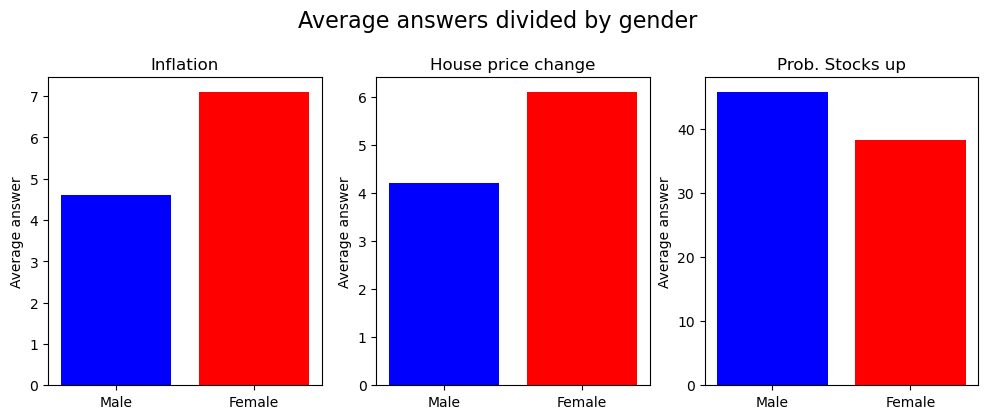

In [21]:
# plot figure for gender 
plot_figure(x=12,y=4,division='gender', dict_function=df_gender_dictionary, categories = genders)


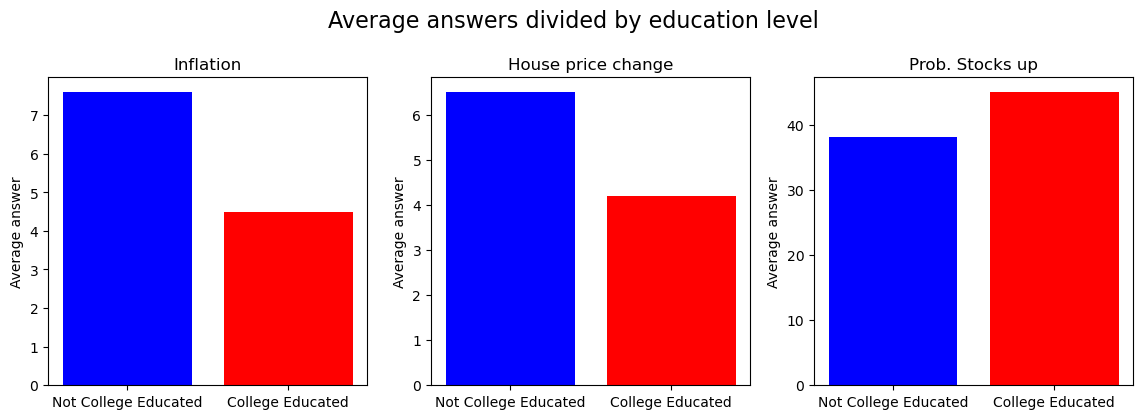

In [22]:
#plot figure for education level
plot_figure(x=14,y=4, division = 'education level', dict_function = df_college_dictionary, categories = education)

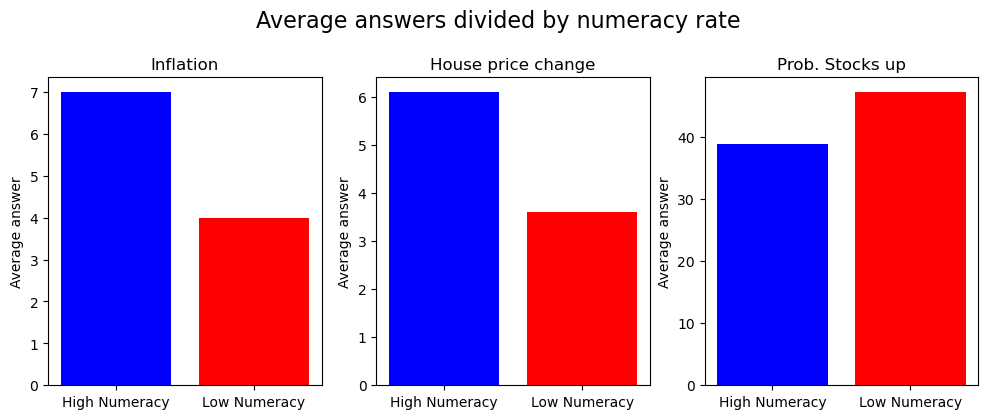

In [23]:
#plot figure for numeracy
plot_figure(x=12, y=4, division = 'numeracy rate', dict_function = df_numeracy_dictionary, categories = numeracy_rate)

### Part 4: Expectations dynamics by group

4.1

In [24]:
# 2015-2024
#set date as index
df4 = df.set_index('date')
#values are not in order, so put them in order of date
df4 = df4.sort_index()
#locate correct years
df4 = df4.loc['2015-01-03': '2024-12-31']
#resample data to monthly
df4monthly = df4.resample('ME')

In [25]:
#1  collapse data to monthly averages and storing them in dictionaries
# Create dictionary for all values

# gender
df_gender4 = df4.groupby(['female'])
df_gender_month_avg = df_gender4.resample('ME', include_groups=False).mean()
gender4_dictionary = {}
for i in range(len(variables)):
    mon_avgg = df_gender_month_avg[variables[i]]
    gender4_dictionary[i]=mon_avgg
    
# education
df_college4 = df4.groupby(['college'])
df_college_avg4 = df_college4.resample('ME', include_groups=False).mean()
educ4_dictionary = {}
for i in range(len(variables)):
    mon_avgc = df_college_avg4[variables[i]]
    educ4_dictionary[i]=mon_avgc


#numeracy rates
df_numeracy4 = df4.groupby(['num_lit_high'])
df_numeracy4_avg = df_numeracy4.resample('ME', include_groups=False).mean()
num4_dictionary = {}
for i in range(len(variables)):
    mon_avgn = df_numeracy4_avg[variables[i]]
    num4_dictionary[i]=mon_avgn

4.2 & 4.3

In [26]:
#2 creating figures

#all dates for vertical lines
trump1 = '2016-11-08'
covid = '2020-02-01'
biden = '2020-11-03'
russia = '2022-02-24'
nobel = '2023-10-03'
trump2 = '2024-11-05'
# create a function to plot each vertical line
def vertical_lines(ax):
    ax.axvline(x=trump1, color='green', linestyle='-', linewidth=1, label = 'Trump first presidency')
    ax.axvline(x= covid, color = 'green', linestyle = '--', linewidth = 1, label = 'Covid-19')
    ax.axvline(x= biden, color = 'green', linestyle = ':', linewidth = 1, label = 'Biden president')
    ax.axvline(x= russia, color = 'purple', linestyle = '-', linewidth = 1, label = 'Russian invasion of Ukraine')
    ax.axvline(x= nobel, color = 'purple', linestyle = '--', linewidth = 1, label = 'Jon Fosse won the Nobel Prize')
    ax.axvline(x= trump2, color = 'purple', linestyle = ':', linewidth = 1, label = 'Trump second presidency')



In [27]:
# create a function to plot a figure for each group
def plot_monthly_avg(division, data_dictionary, indicator):
    fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharex=True)
    fig.suptitle(f'Monthly Average by {division}', fontsize=16, y=1)
    #loop to create a panel for each variable
    for i in range(len(variables)):
        mon_avg = data_dictionary[i]
        y=0
        for a in genderint:
            data = mon_avg.loc[a]
            data.plot(ax = axes[i], label = indicator[y], color = colors[y])
            y+=1
            
        axes[i].set_title(figures[i])
        axes[i].set_xlabel('Months')
        axes[i].set_ylabel('Average')
        #plot vertical lines
        vertical_lines(axes[i])
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.8))

    plt.tight_layout()
    plt.show()


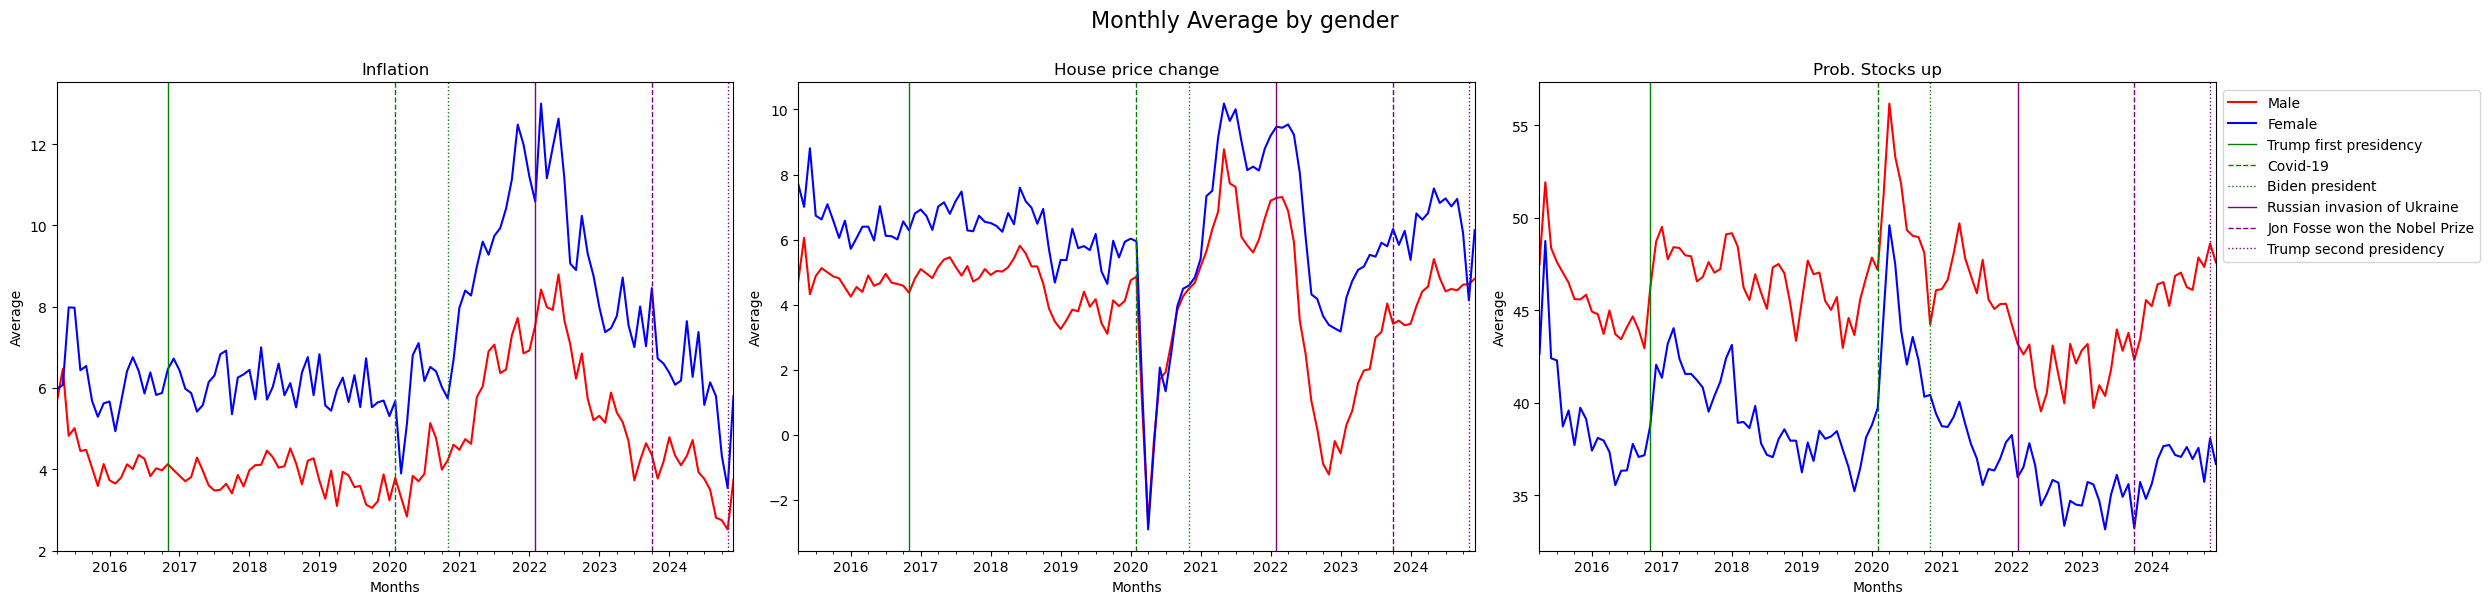

In [28]:
# plot figure for gender
plot_monthly_avg(division = "gender", data_dictionary = gender4_dictionary, indicator = genders)



 After Trump's  first presidency began, stock price expectations rose, particularly among males, while inflation and house price expectations remained relatively steady. The onset of COVID-19 caused a sharp drop in house price expectations and a decline in inflation expectations for both genders, followed by a gradual recovery. Following the start of Biden’s presidency, both inflation and house price expectations increased significantly across males and females. Stock price expectations fluctuated but generally remained higher for males throughout the period. Later events show smaller or less distinct changes in expectations.







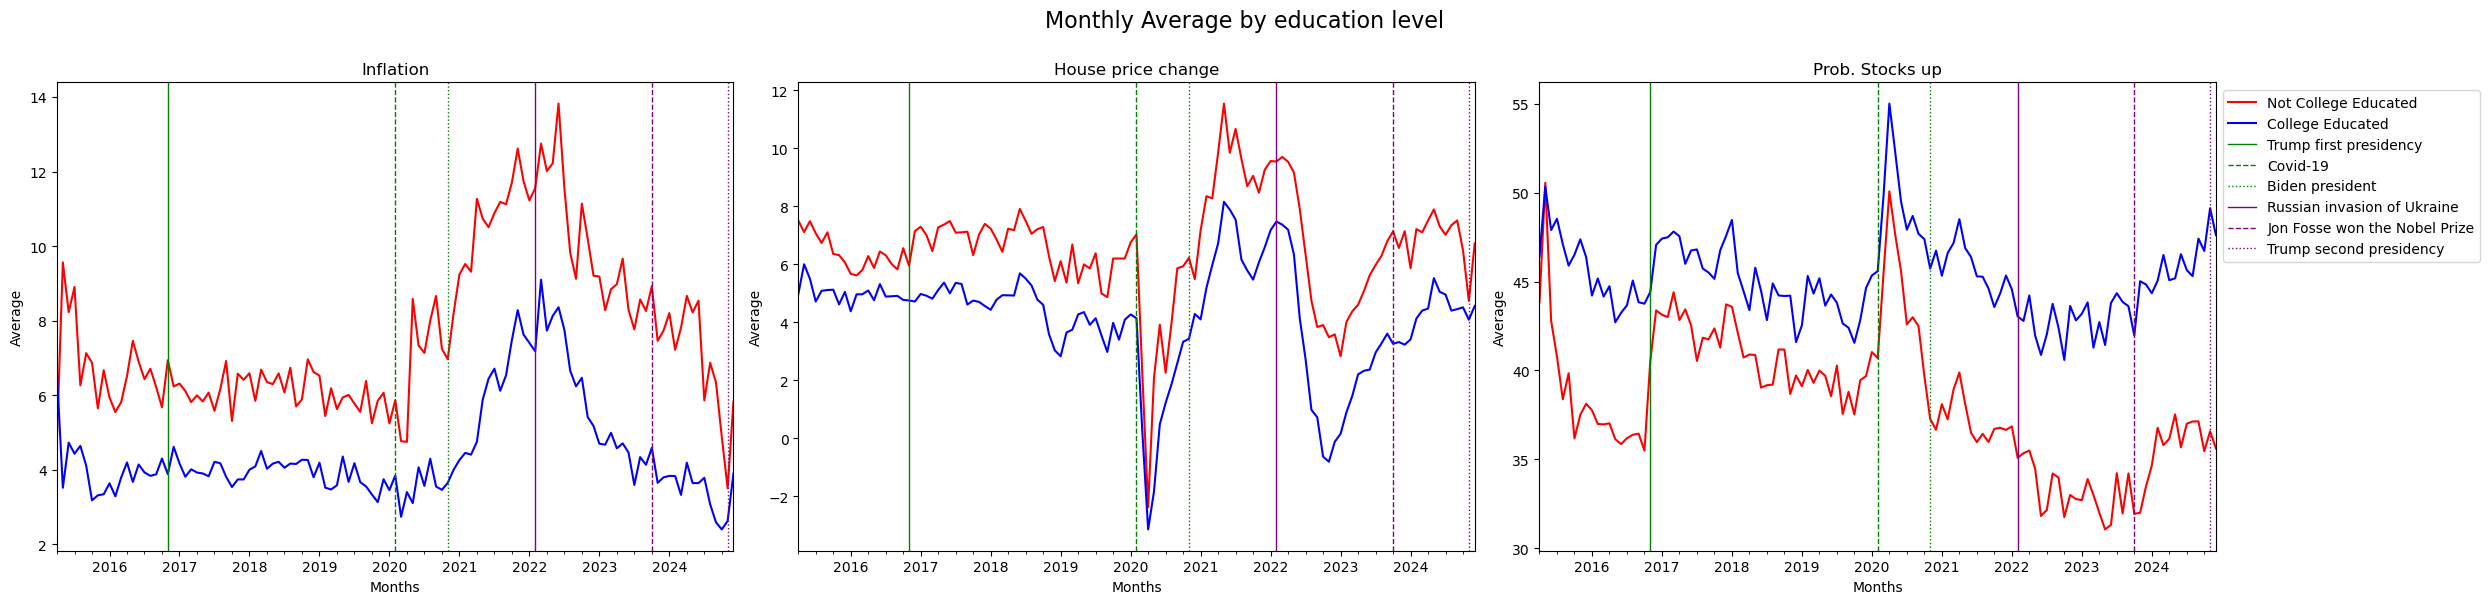

In [29]:
#plot figure for education level
plot_monthly_avg(division = 'education level', data_dictionary = educ4_dictionary, indicator = education)

After Trump’s first presidency began, stock price expectations rose noticeably, especially for college-educated individuals, while inflation and house price expectations stayed relatively stable. At the start of COVID-19, inflation expectations dropped sharply but then gradually increased again. House price expectations plunged dramatically at the pandemic onset before recovering. Following Biden’s presidency, both inflation and house price expectations increased significantly for both education groups, while stock price expectations showed a moderate rise. The Russian invasion of Ukraine and other later events show smaller or less clear shifts across the variables. 

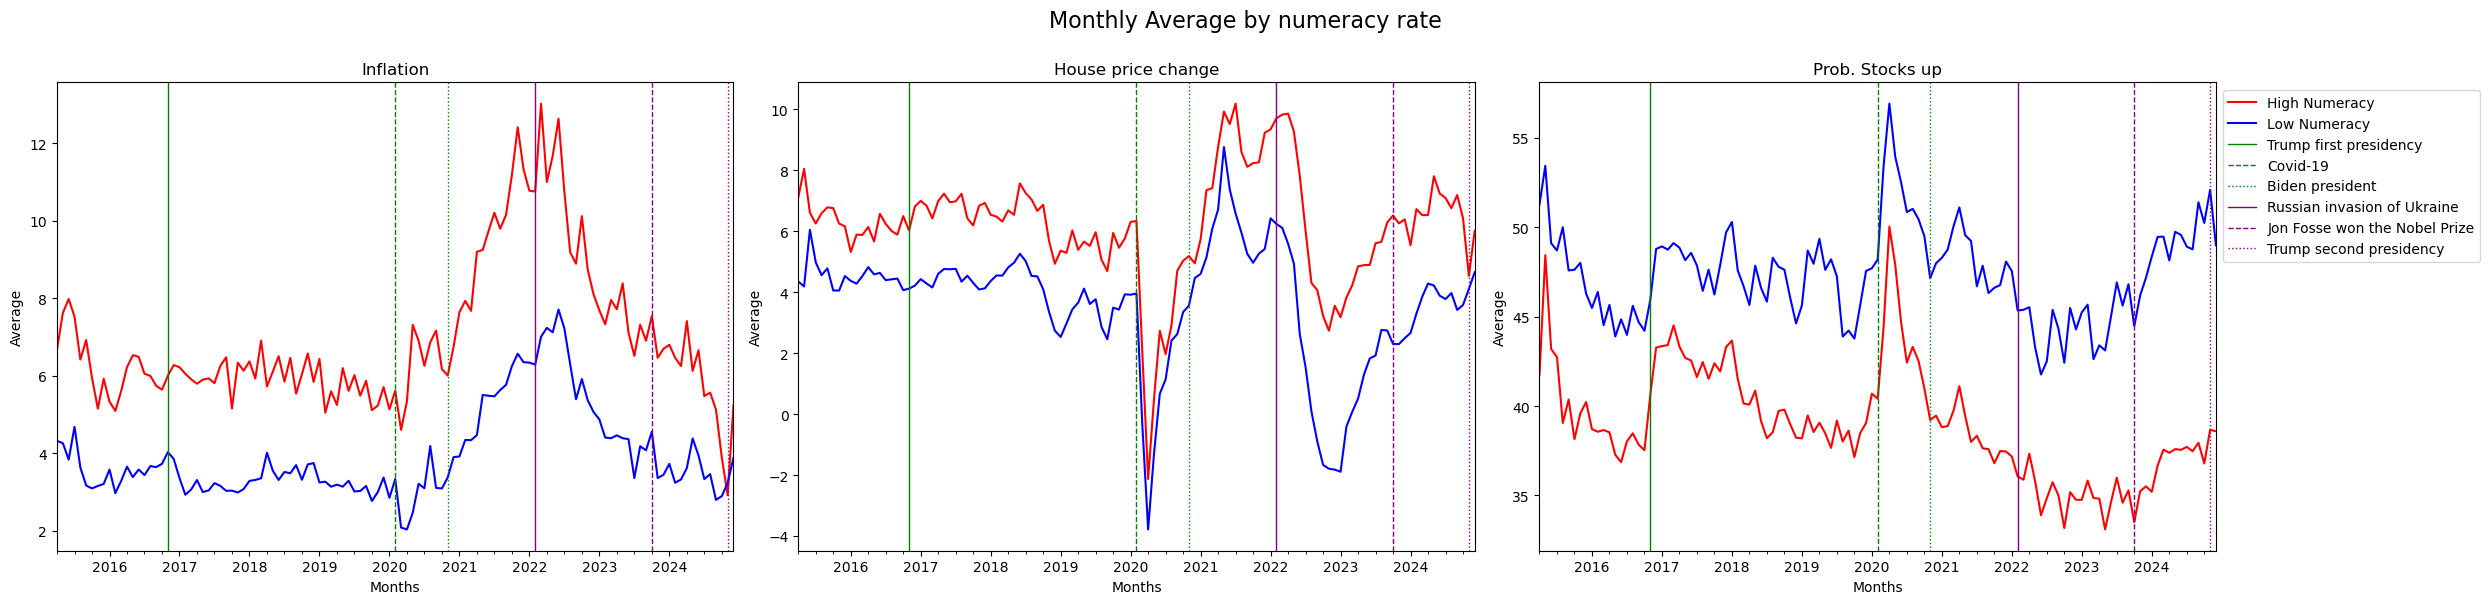

In [30]:
# plot figure for numeracy rate
plot_monthly_avg(division = 'numeracy rate', data_dictionary = num4_dictionary, indicator = numeracy_rate)

Following Trump’s first presidency, inflation and house price expectations remained relatively steady for both high and low numeracy groups, while stock price expectations showed modest variation. The onset of COVID-19 caused a sharp drop in house price expectations and a decline in inflation expectations for both groups, followed by a rebound. After Biden’s presidency began, inflation and house price expectations rose noticeably, especially for the high numeracy group. Stock price expectations fluctuated but generally remained higher for the low numeracy group throughout.

### Part 5: Correlations with past & future realizations

5.1

C:\Users\sophi\AppData\Local\Temp\ipykernel_5108\620945496.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="date", freq="M"), "female"])["inflation"]


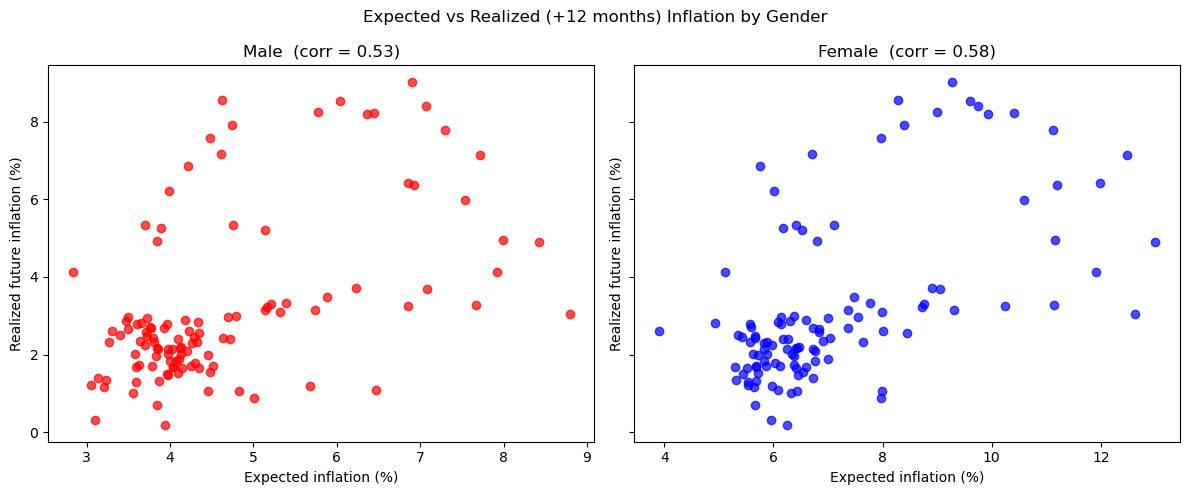

In [31]:
# Load CPI data
cpi = pd.read_csv("data/CPI.csv", parse_dates=["DATE"])
cpi.rename(columns={"DATE": "date", "CPI": "cpi"}, inplace=True)
cpi.sort_values("date", inplace=True)

# Compute forward 12-month inflation
cpi["cpi_future12"] = cpi["cpi"].shift(-12)
cpi["inflation_future12"] = (cpi["cpi_future12"] - cpi["cpi"]) / cpi["cpi"] * 100

# Compute monthly expected inflation by gender 
df_gender_month_avg = (
    df.groupby([pd.Grouper(key="date", freq="M"), "female"])["inflation"]
    .mean()
    .reset_index()
    .rename(columns={"inflation": "exp_inflation"})
)

# Align dates by month 
df_gender_month_avg["month"] = df_gender_month_avg["date"].dt.to_period("M")
cpi["month"] = cpi["date"].dt.to_period("M")

# Merge on month
merged_future = pd.merge(
    df_gender_month_avg,
    cpi[["month", "inflation_future12"]],
    on="month",
    how="inner"
)

# Convert month back to datetime for plotting
merged_future["date"] = merged_future["month"].dt.to_timestamp()

# ---------- Plot -----------

genders = {0.0: "Male", 1.0: "Female"}
colors = ["red", "blue"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (val, label), color in zip(axes, genders.items(), colors):

    df_g = merged_future[merged_future["female"] == val]
    corr = df_g["exp_inflation"].corr(df_g["inflation_future12"])

    ax.scatter(df_g["exp_inflation"], df_g["inflation_future12"], alpha=0.7, color=color)
    ax.set_title(f"{label}  (corr = {corr:.2f})")
    ax.set_xlabel("Expected inflation (%)")
    ax.set_ylabel("Realized future inflation (%)")

plt.suptitle("Expected vs Realized (+12 months) Inflation by Gender")
plt.tight_layout()
plt.show()




The scatter plots display expected versus realized inflation twelve months ahead, separately for men and women. Both graphs indicate a positive but modest correlation: 0.39 for men and 0.40 for women. This confirms that while expectations are somewhat aligned with future outcomes, the relationship is weak. Most points cluster in the lower-left region of the graphs, showing that when expected inflation is moderate, realized inflation is usually moderate as well. However, there are several outliers, particularly for women, where expectations are much higher than actual inflation, highlighting the limited predictive accuracy of individual forecasts.

The relatively low correlation coefficients suggest that people do not generate highly accurate predictions of future inflation. Instead, expectations likely rely on heuristics or simple rules of thumb. For instance, individuals might anchor on recent price trends or salient economic events rather than performing detailed calculations. The scatter plots support this interpretation: while there is a general upward trend, the points are widely dispersed, indicating substantial deviations between expected and realized inflation.

Gender differences are present but modest. Women, on average, appear to report slightly higher expected inflation than men, and their points are more widely spread, reflecting greater variability in expectations. Nonetheless, the correlation with actual inflation is nearly the same for both genders, implying that both men and women exhibit similar limitations in forecasting accuracy. The presence of outliers in the female panel emphasizes that extreme expectations are more common among women, but the overall predictive power remains weak for both groups.

Overall, the results suggest that individuals’ beliefs about inflation are only loosely tied to actual future inflation, supporting the view that simple cognitive shortcuts play a major role in expectation formation. Gender differences are small, with women showing slightly higher and more dispersed expectations, but both groups demonstrate limited ability to forecast inflation precisely over a twelve-month horizon. These findings underline the challenges faced by policymakers in managing public expectations of inflation.


5.2

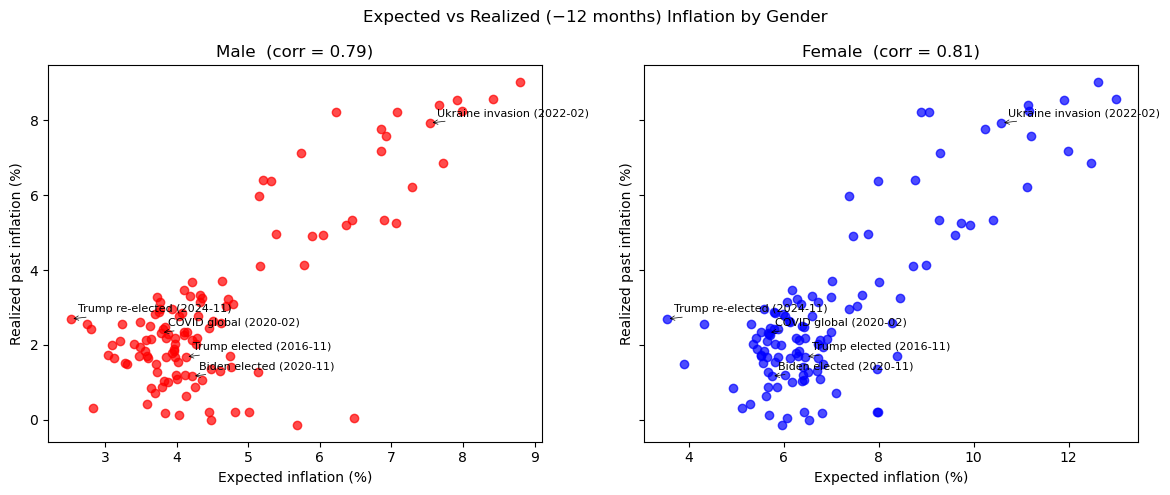

In [32]:
# CPI already loaded in Part 5A
# Compute backward 12-month inflation
cpi["cpi_past12"] = cpi["cpi"].shift(12)
cpi["inflation_past12"] = (cpi["cpi"] - cpi["cpi_past12"]) / cpi["cpi_past12"] * 100

# Align to monthly period for merging
df_gender_month_avg["month"] = df_gender_month_avg["date"].dt.to_period("M")
cpi["month"] = cpi["date"].dt.to_period("M")

# Merge on monthly period
merged_past = pd.merge(
    df_gender_month_avg,
    cpi[["month", "inflation_past12"]],
    on="month",
    how="inner"
)

# Convert period back to datetime
merged_past["date"] = merged_past["month"].dt.to_timestamp()

# ---- Scatter plot ----
genders = {0.0: "Male", 1.0: "Female"}
colors = ["red", "blue"]
events = {
    "Trump elected (2016-11)": "2016-11-01",
    "COVID global (2020-02)": "2020-02-01",
    "Biden elected (2020-11)": "2020-11-01",
    "Ukraine invasion (2022-02)": "2022-02-01",
    "Trump re-elected (2024-11)": "2024-11-01",
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, (val, label), color in zip(axes, genders.items(), colors):
    df_g = merged_past[merged_past["female"] == val]
    corr = df_g["exp_inflation"].corr(df_g["inflation_past12"])
    ax.scatter(df_g["exp_inflation"], df_g["inflation_past12"], alpha=0.7, color=color)
    ax.set_title(f"{label}  (corr = {corr:.2f})")
    ax.set_xlabel("Expected inflation (%)")
    ax.set_ylabel("Realized past inflation (%)")

    for event, date_str in events.items():
        date = pd.Timestamp(date_str)
        if date in df_g["date"].values:
            x = df_g.loc[df_g["date"] == date, "exp_inflation"].values[0]
            y = df_g.loc[df_g["date"] == date, "inflation_past12"].values[0]
            ax.annotate(event, (x, y), textcoords="offset points", xytext=(5, 5),
                        fontsize=8, color="black",
                        arrowprops=dict(arrowstyle="->", lw=0.5))

plt.suptitle("Expected vs Realized (−12 months) Inflation by Gender")
plt.tight_layout()
plt.show()


The results show a clear difference between men and women in how closely their inflation expectations track actual price changes. The correlation between expected and realized inflation is notably higher for women (0.63) than for men (0.34). This suggests that women’s expectations tend to follow movements in realized inflation more closely, while men’s expectations appear less responsive to recent inflation trends.

This pattern implies that women are more likely to adjust their beliefs about future inflation based on their recent experiences with price changes. Their expectations seem to incorporate current inflationary conditions more directly, reflecting a stronger link between personal observations and economic beliefs. Men, by contrast, show a weaker connection between expectations and realized outcomes, which could suggest that their views are more stable or anchored by longer-term considerations rather than recent price movements.

Such differences may arise from variations in exposure to price information or differences in how economic experiences are processed. For instance, individuals who are more involved in day-to-day purchasing decisions may notice and respond more quickly to changing prices. Overall, the results point to meaningful gender differences in how people form and update their beliefs about inflation. Women appear to respond more closely to observed economic conditions, whereas men’s expectations remain relatively less sensitive to short-term price developments.

### AI statement
We used generative ai for some parts of the code. We asked it for help importing all the files. It suggested using os to make a list of all the files to read, and os.path.join to create a file path for all the files. We also used it to gain better understanding of the quantile function, because we were not familiar with it. We also asked it to help with debugging some problems in our code.

### Use of other sources

We used lectures and workshops to create this code. We also used google to look up certain functions to use. 